In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [33]:
df = pd.read_csv('titanic_toy.csv')

In [34]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [35]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [36]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [38]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [39]:
x_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [40]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minus'] = x_train['Age'].fillna(-1)
x_train['fare_999'] = x_train['Fare'].fillna(999)
x_train['fare_minus'] = x_train['Fare'].fillna(-1)

In [41]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age variance after 99 imputation: ', x_train['Age_99'].var())
print('Age variance after -1 imputation: ', x_train['Age_minus'].var())
print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare variance after 999 imputation: ', x_train['fare_999'].var())
print('Fare variance after -1 imputation: ', x_train['fare_minus'].var())

Original Age variable variance:  210.2517072477435
Age variance after 99 imputation:  932.9665366701432
Age variance after -1 imputation:  315.9955036260055
Original Fare variable variance:  2761.0314349486343
Fare variance after 999 imputation:  47525.470595360035
Fare variance after -1 imputation:  2675.2394049177024


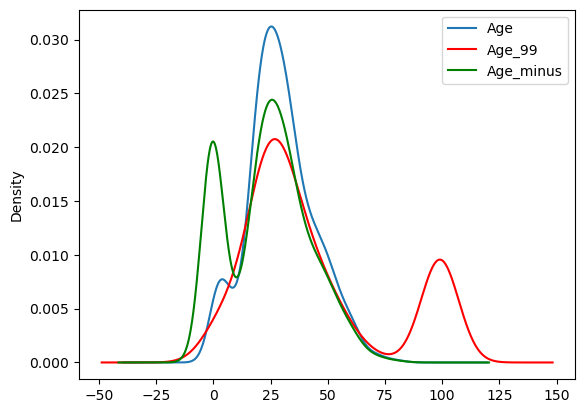

In [42]:
fig = plt.figure()
ax =fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable distribution after 99 imputation
x_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable distribution after -1 imputation
x_train['Age_minus'].plot(kind='kde', ax=ax, color='green')

# add legends 
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

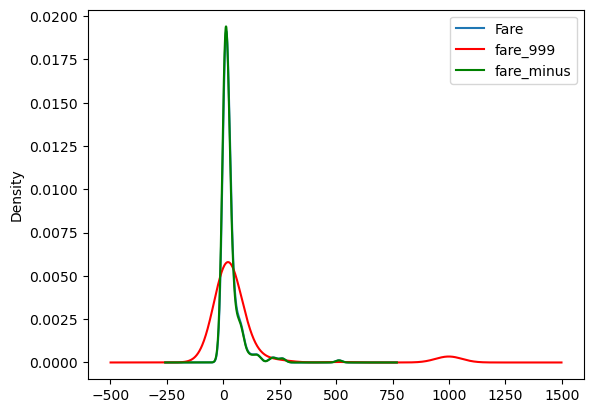

In [43]:
fig = plt.figure()
ax =fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable distribution after 99 imputation
x_train['fare_999'].plot(kind='kde', ax=ax, color='red')

# variable distribution after -1 imputation
x_train['fare_minus'].plot(kind='kde', ax=ax, color='green')

# add legends 
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

In [44]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus,fare_999,fare_minus
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
Age_minus,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
fare_minus,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


In [45]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus,fare_999,fare_minus
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017
Age_minus,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159
fare_999,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357
fare_minus,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [47]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [48]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [49]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [50]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [51]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [52]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [53]:
x_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])